In [2]:
import torch
import numpy
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

Running on CPU


In [4]:
# Hyperparams:
LEARNING_RATE = .001
BATCH_SIZE = 16
NUM_EPOCHS = 10

In [5]:
TrainDataset = torchvision.datasets.CIFAR10("./cifar10", train=True, transform=torchvision.transforms.ToTensor(),download=True)
TestDataset = torchvision.datasets.CIFAR10("./cifar10", transform=torchvision.transforms.ToTensor(),download=True)

100.0%

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [7]:
TrainDataLoader = torch.utils.data.DataLoader(TrainDataset,batch_size=BATCH_SIZE,shuffle=True)
TestDataLoader = torch.utils.data.DataLoader(TestDataset,batch_size=BATCH_SIZE,shuffle=True)

torch.Size([16, 3, 32, 32]) torch.Size([16])
0


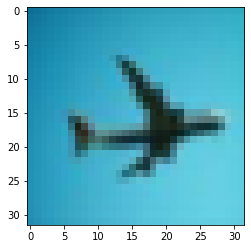

In [9]:
TrainIterator = iter(TrainDataLoader)
BatchOfSamples = TrainIterator.next()
Inputs, Labels = BatchOfSamples
print(Inputs.size(), Labels.size())
plt.imshow(Inputs[0].squeeze().permute(1,2,0))
print(Labels[0].item())

In [14]:
class CNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(input_dim, 16, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(1024,128)
        self.fc2 = nn.Linear(128,output_dim)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.leaky_relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = F.leaky_relu(x)
        x = self.maxpool1(x)
        x = torch.reshape(x,[16,1024])
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        return x

In [27]:
# CREATE NN MODEL
model = CNN(3,10)
model.to(device)
Loss = nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [16]:
# TRAINING STEP
import time
start = time.time()

model.train()

for epoch in range(NUM_EPOCHS):
    for data in iter(TrainDataLoader):
        batch_inputs, batch_labels = data
        Optimizer.zero_grad()
        predictions = model(batch_inputs)
        current_loss = Loss(predictions, batch_labels)
        current_loss.backward()
        Optimizer.step()
    print("Epoch: {} Loss: {}".format(epoch+1,current_loss))
    print("Time elapsed: {} minutes".format((time.time()-start)/60.0))

Epoch: 1 Loss: 0.9762448072433472
Time elapsed: 0.4326488018035889 minutes
Epoch: 2 Loss: 1.118722677230835
Time elapsed: 0.8580104390780131 minutes
Epoch: 3 Loss: 1.2763564586639404
Time elapsed: 1.2751084685325622 minutes
Epoch: 4 Loss: 0.5862093567848206
Time elapsed: 1.7160174687703451 minutes
Epoch: 5 Loss: 1.2358436584472656
Time elapsed: 2.1609275539716086 minutes
Epoch: 6 Loss: 0.685592770576477
Time elapsed: 2.5874700506528217 minutes
Epoch: 7 Loss: 0.5668060183525085
Time elapsed: 3.0010194023450216 minutes
Epoch: 8 Loss: 1.2605173587799072
Time elapsed: 3.4109951655069985 minutes
Epoch: 9 Loss: 0.34613436460494995
Time elapsed: 3.834934182961782 minutes
Epoch: 10 Loss: 0.15122002363204956
Time elapsed: 4.257877699534098 minutes


In [37]:
def train():
    model.train()
    
    for batch_inputs, batch_labels in TrainDataLoader:
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
        Optimizer.zero_grad()
        batch_outputs = model(batch_inputs)
        current_loss = Loss(batch_outputs, batch_labels)
        current_loss.backward()
        Optimizer.step()
    print('End of epoch loss', round(current_loss.item(), 3))

In [48]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def test(loader):
    model.eval()
    correct = 0
    for batch_inputs, batch_labels in loader:
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
        predictions = model(batch_inputs).argmax(axis=1)
        correct += (predictions==batch_labels).sum().item()
    print('End of epoch accuracy: ', 100*correct/(len(loader)*16), '%')
    
    for i in range(len(batch_labels)):
        print('Guess:', classes[predictions[i]], '| Label:', classes[batch_labels[i]])
        plt.imshow(batch_inputs[i].permute(1,2,0))
        plt.show()

End of epoch loss 0.383
End of epoch accuracy:  91.554 %
Guess: horse | Label: horse


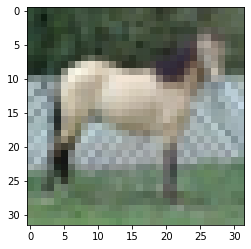

Guess: bird | Label: cat


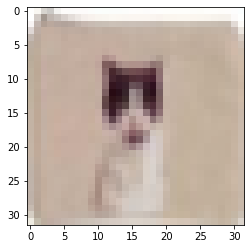

Guess: dog | Label: dog


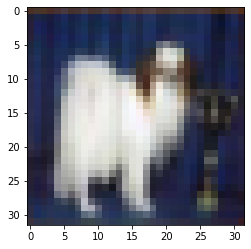

Guess: car | Label: car


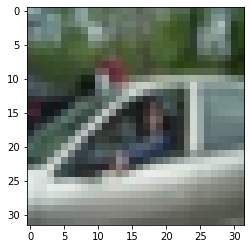

Guess: deer | Label: deer


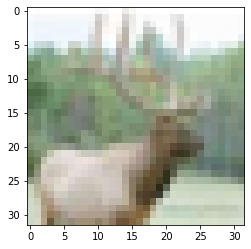

Guess: truck | Label: truck


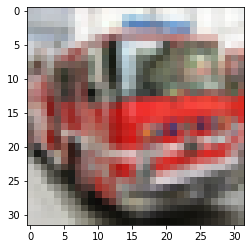

Guess: deer | Label: deer


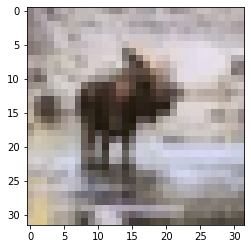

Guess: car | Label: car


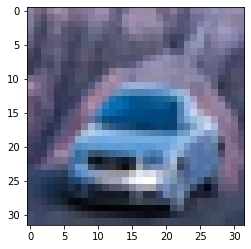

Guess: truck | Label: plane


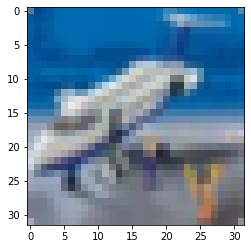

Guess: dog | Label: dog


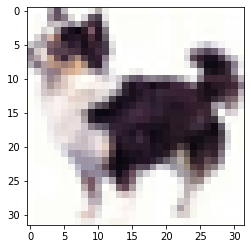

Guess: cat | Label: cat


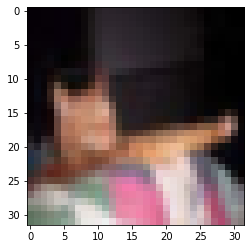

Guess: plane | Label: plane


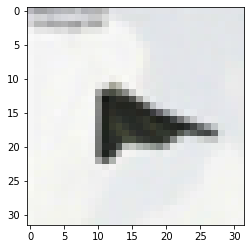

Guess: deer | Label: deer


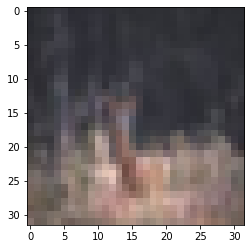

Guess: dog | Label: dog


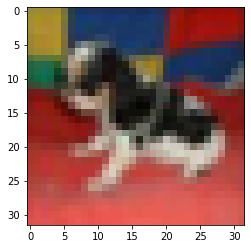

Guess: plane | Label: plane


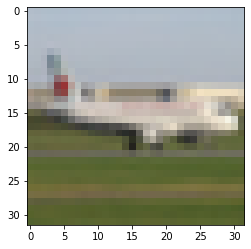

Guess: cat | Label: cat


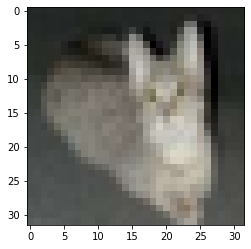

End of epoch loss 0.228
End of epoch accuracy:  92.01 %
Guess: ship | Label: ship


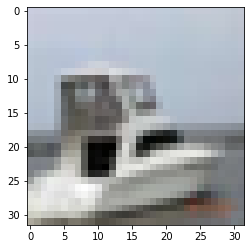

Guess: dog | Label: cat


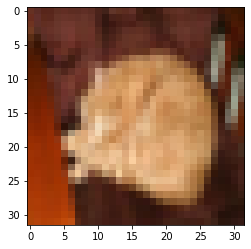

Guess: car | Label: car


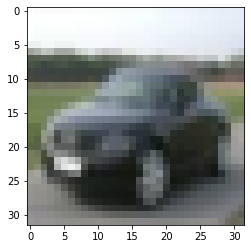

Guess: bird | Label: bird


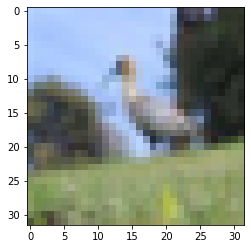

Guess: car | Label: car


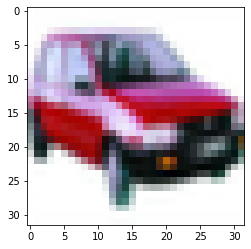

Guess: plane | Label: plane


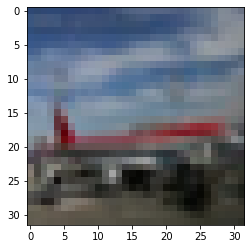

Guess: horse | Label: horse


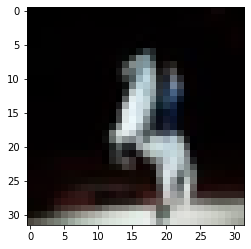

Guess: ship | Label: ship


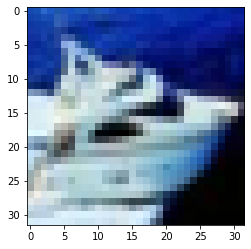

Guess: dog | Label: dog


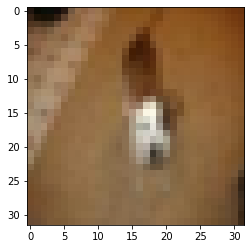

Guess: cat | Label: frog


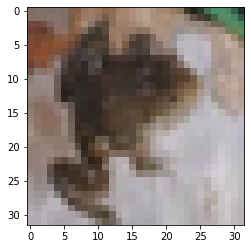

Guess: car | Label: car


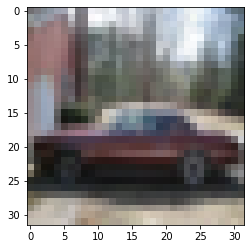

Guess: deer | Label: deer


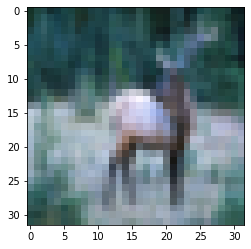

Guess: ship | Label: ship


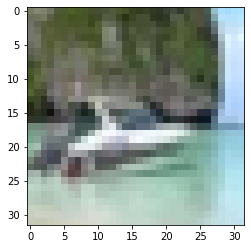

Guess: deer | Label: deer


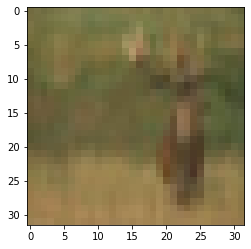

Guess: cat | Label: cat


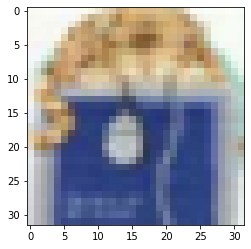

Guess: horse | Label: horse


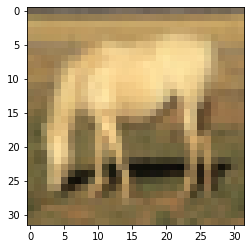

End of epoch loss 0.244
End of epoch accuracy:  94.252 %
Guess: cat | Label: cat


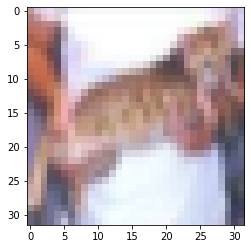

Guess: bird | Label: bird


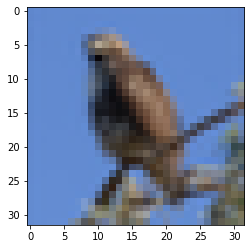

Guess: truck | Label: truck


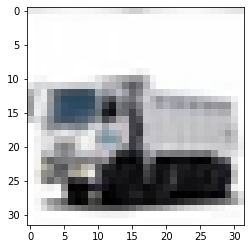

Guess: deer | Label: deer


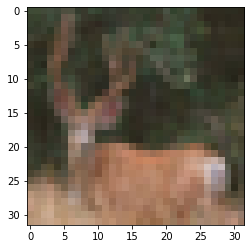

Guess: deer | Label: deer


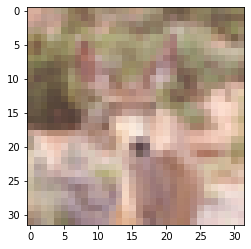

Guess: cat | Label: bird


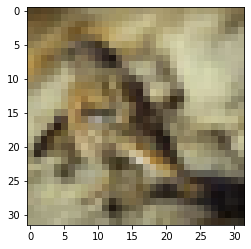

Guess: deer | Label: deer


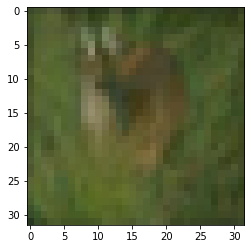

Guess: plane | Label: plane


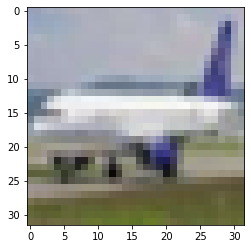

Guess: horse | Label: horse


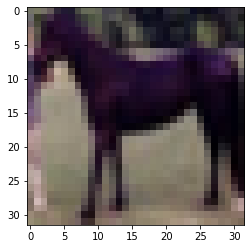

Guess: car | Label: car


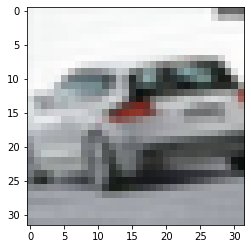

Guess: frog | Label: frog


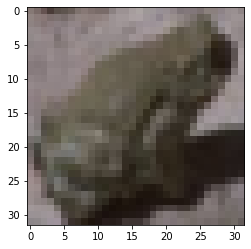

Guess: cat | Label: cat


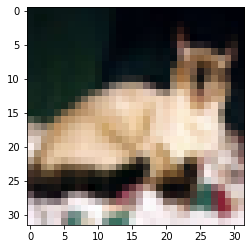

Guess: plane | Label: plane


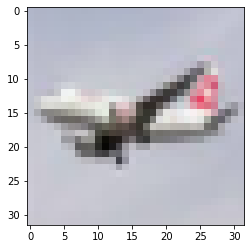

Guess: truck | Label: truck


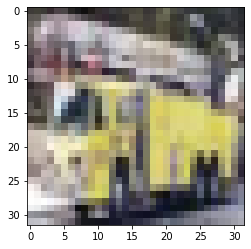

Guess: plane | Label: plane


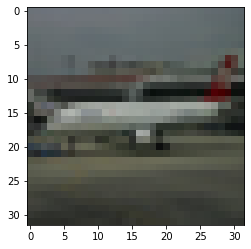

Guess: horse | Label: horse


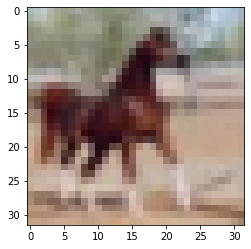

End of epoch loss 0.475
End of epoch accuracy:  95.514 %
Guess: plane | Label: plane


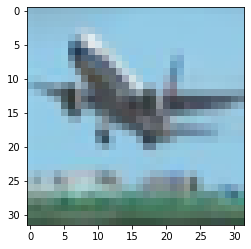

Guess: deer | Label: deer


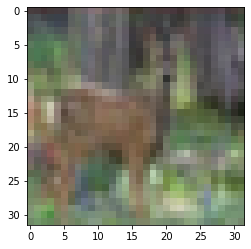

Guess: truck | Label: truck


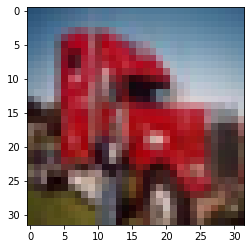

Guess: car | Label: car


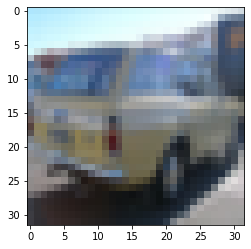

Guess: deer | Label: deer


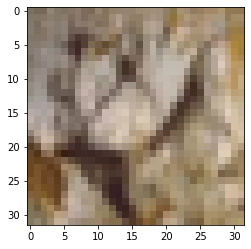

Guess: dog | Label: dog


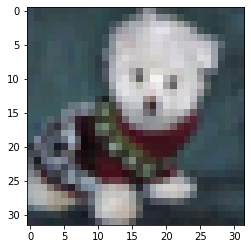

Guess: horse | Label: horse


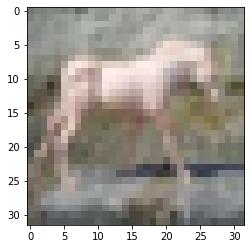

Guess: bird | Label: bird


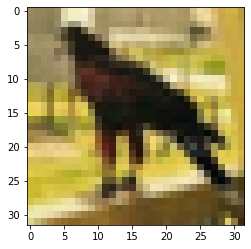

Guess: plane | Label: plane


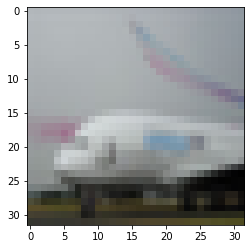

Guess: deer | Label: deer


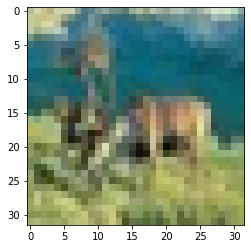

Guess: ship | Label: ship


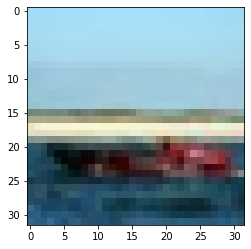

Guess: car | Label: car


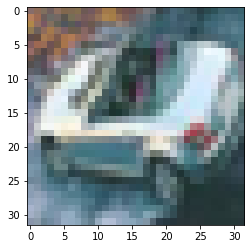

Guess: plane | Label: plane


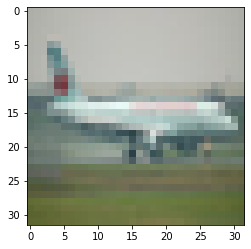

Guess: deer | Label: deer


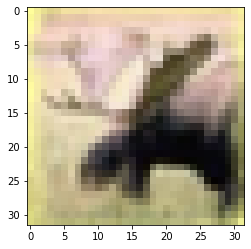

Guess: frog | Label: frog


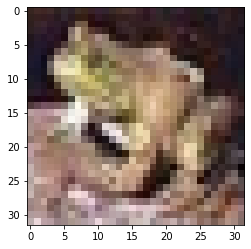

Guess: ship | Label: ship


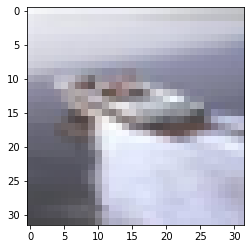

End of epoch loss 0.176
End of epoch accuracy:  95.724 %
Guess: bird | Label: bird


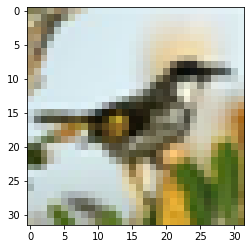

Guess: bird | Label: bird


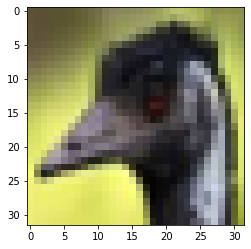

Guess: dog | Label: dog


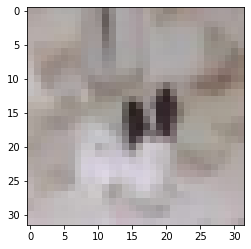

Guess: dog | Label: dog


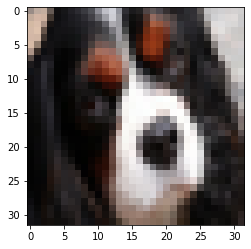

Guess: bird | Label: bird


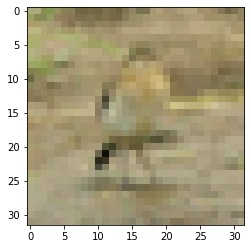

Guess: plane | Label: plane


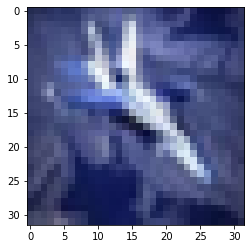

Guess: bird | Label: bird


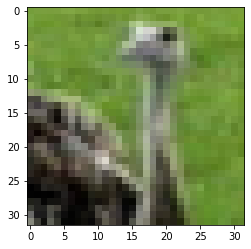

Guess: dog | Label: dog


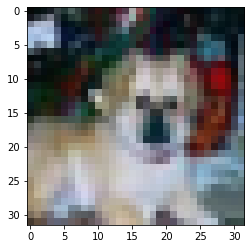

Guess: car | Label: car


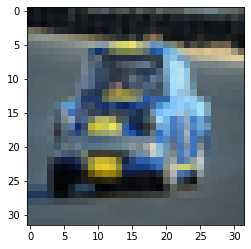

Guess: cat | Label: cat


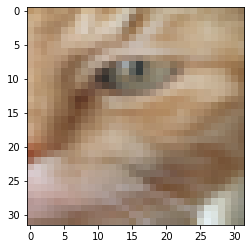

Guess: ship | Label: ship


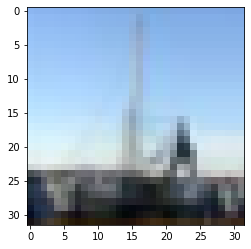

Guess: ship | Label: ship


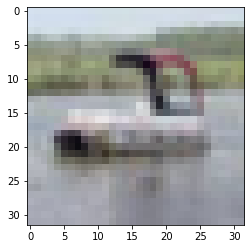

Guess: bird | Label: bird


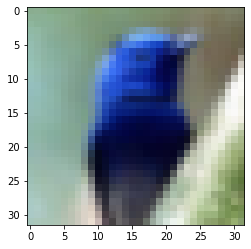

Guess: frog | Label: frog


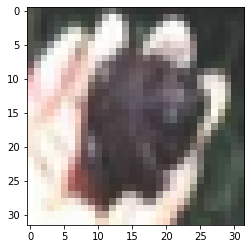

Guess: cat | Label: cat


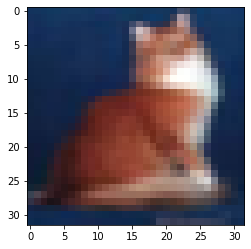

Guess: frog | Label: frog


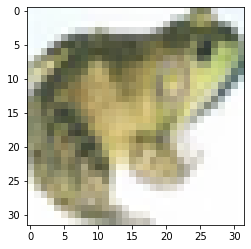

End of epoch loss 0.122
End of epoch accuracy:  95.474 %
Guess: truck | Label: truck


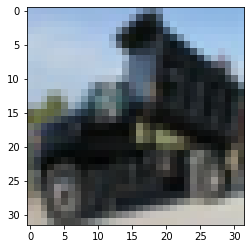

Guess: bird | Label: bird


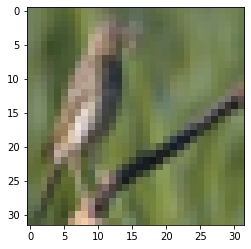

Guess: cat | Label: deer


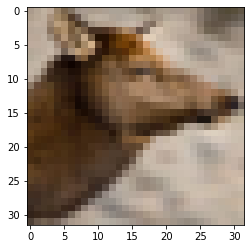

Guess: dog | Label: dog


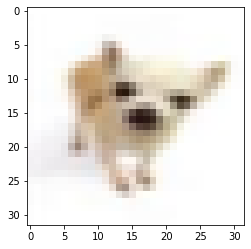

Guess: cat | Label: cat


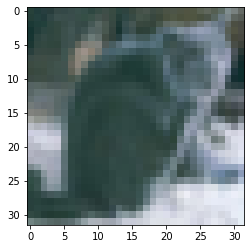

Guess: horse | Label: deer


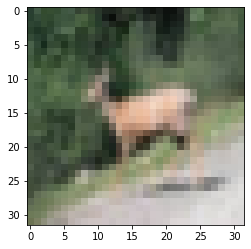

Guess: car | Label: car


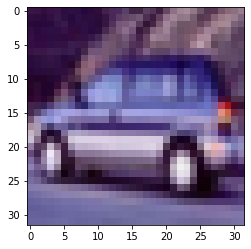

Guess: plane | Label: plane


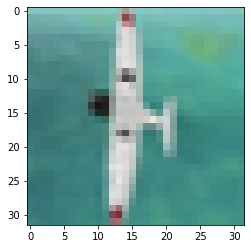

Guess: horse | Label: horse


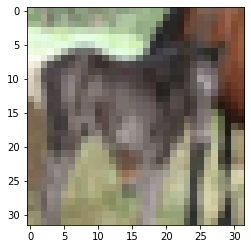

Guess: horse | Label: horse


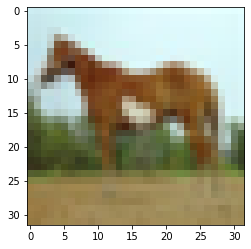

Guess: bird | Label: bird


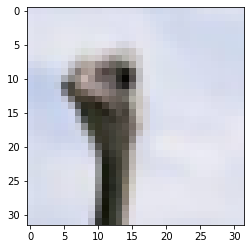

Guess: ship | Label: ship


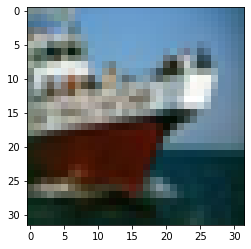

Guess: truck | Label: truck


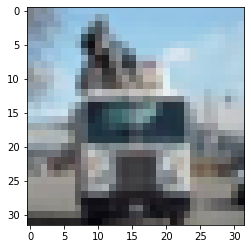

Guess: dog | Label: dog


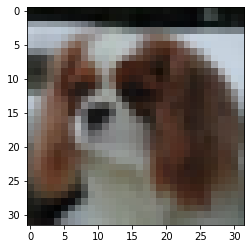

Guess: car | Label: car


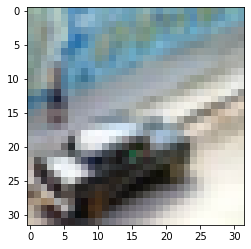

Guess: cat | Label: cat


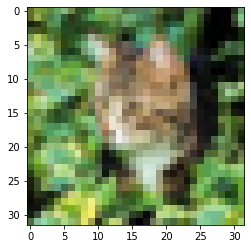

End of epoch loss 0.315
End of epoch accuracy:  95.256 %
Guess: frog | Label: frog


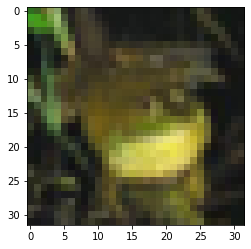

Guess: plane | Label: plane


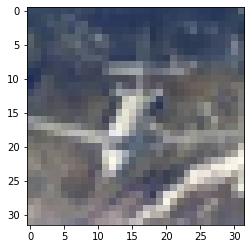

Guess: car | Label: car


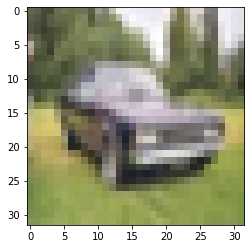

Guess: dog | Label: dog


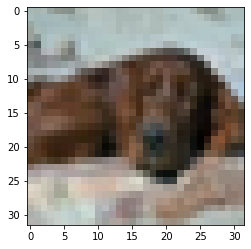

Guess: ship | Label: ship


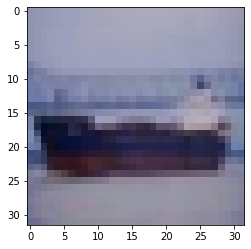

Guess: car | Label: car


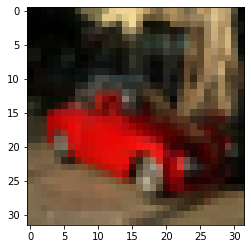

Guess: ship | Label: ship


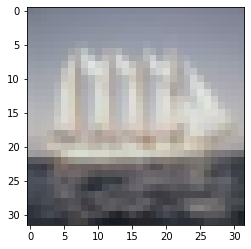

Guess: frog | Label: frog


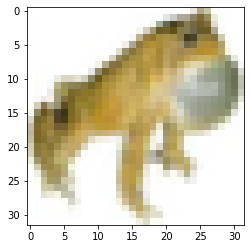

Guess: cat | Label: cat


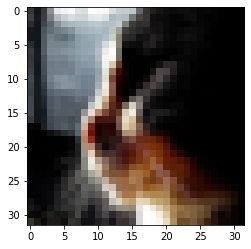

Guess: frog | Label: frog


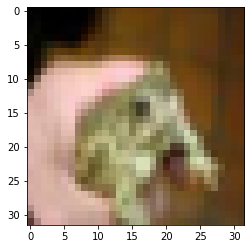

Guess: frog | Label: frog


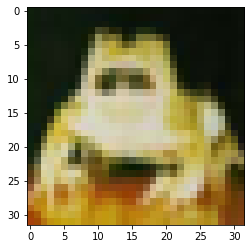

Guess: ship | Label: ship


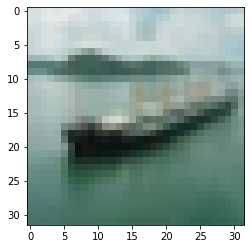

Guess: truck | Label: truck


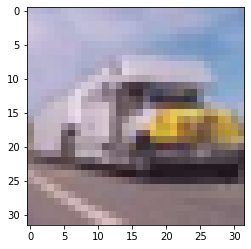

Guess: deer | Label: horse


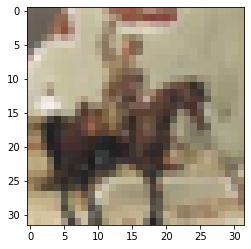

Guess: horse | Label: horse


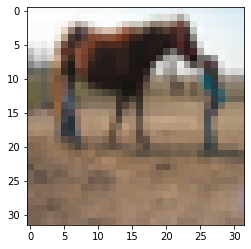

Guess: horse | Label: horse


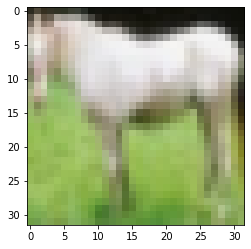

End of epoch loss 0.26
End of epoch accuracy:  93.872 %
Guess: dog | Label: dog


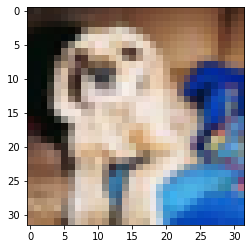

Guess: bird | Label: bird


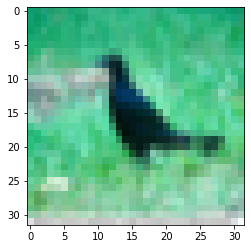

Guess: deer | Label: deer


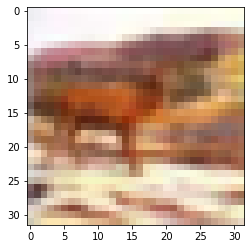

Guess: car | Label: car


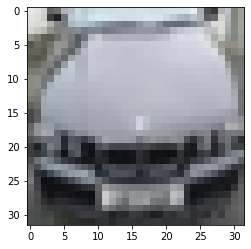

Guess: cat | Label: cat


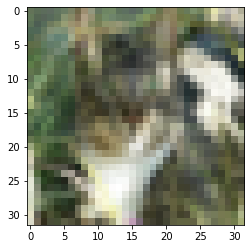

Guess: dog | Label: cat


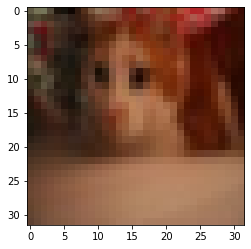

Guess: horse | Label: horse


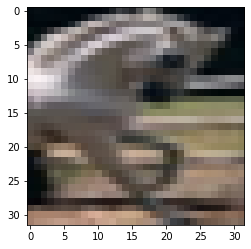

Guess: deer | Label: deer


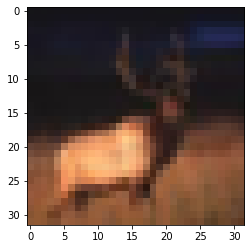

Guess: car | Label: car


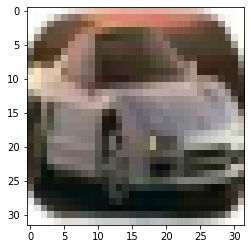

Guess: ship | Label: ship


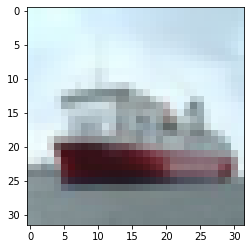

Guess: truck | Label: truck


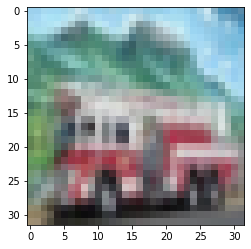

Guess: deer | Label: deer


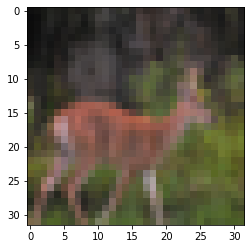

Guess: dog | Label: dog


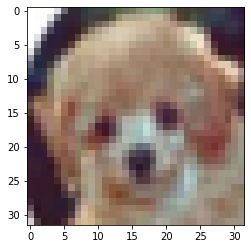

Guess: truck | Label: truck


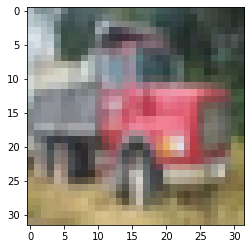

Guess: horse | Label: horse


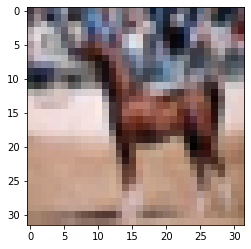

Guess: plane | Label: plane


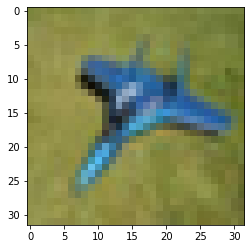

End of epoch loss 0.062
End of epoch accuracy:  96.564 %
Guess: cat | Label: cat


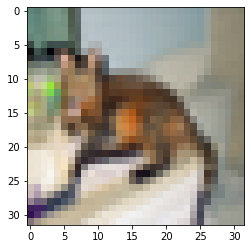

Guess: plane | Label: plane


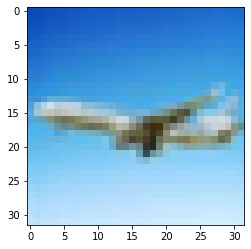

Guess: ship | Label: ship


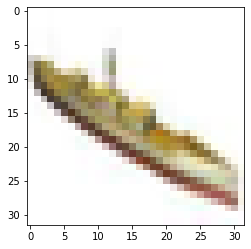

Guess: deer | Label: deer


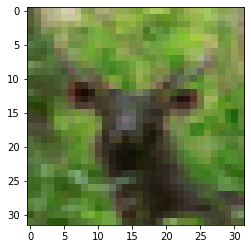

Guess: truck | Label: truck


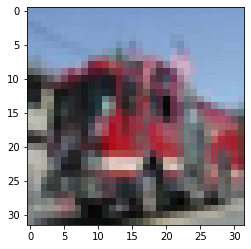

Guess: ship | Label: ship


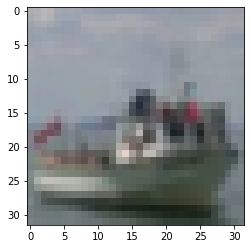

Guess: plane | Label: plane


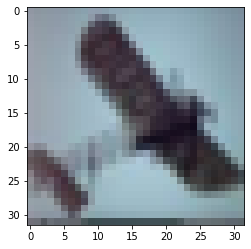

Guess: cat | Label: cat


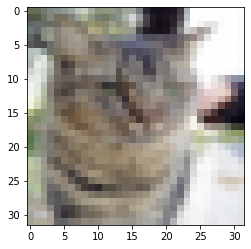

Guess: plane | Label: plane


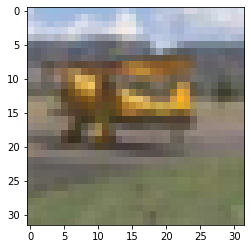

Guess: plane | Label: plane


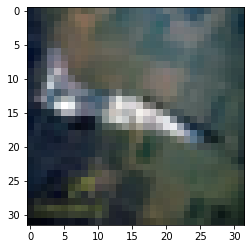

Guess: plane | Label: plane


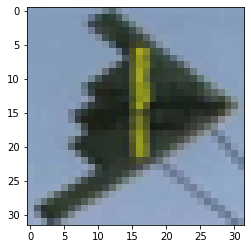

Guess: car | Label: car


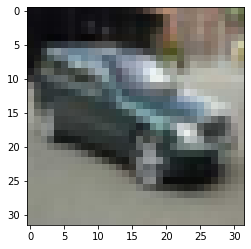

Guess: bird | Label: bird


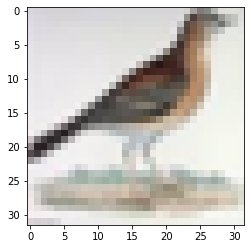

Guess: cat | Label: cat


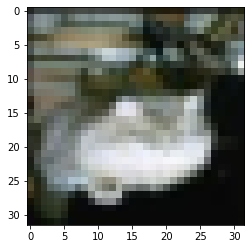

Guess: frog | Label: frog


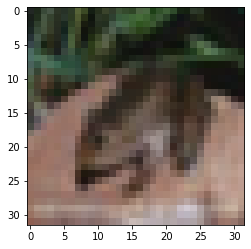

Guess: truck | Label: truck


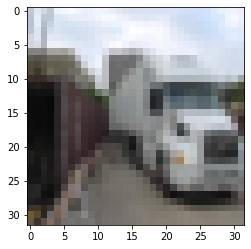

End of epoch loss 0.323
End of epoch accuracy:  95.734 %
Guess: dog | Label: dog


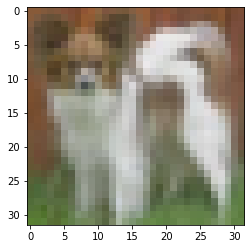

Guess: dog | Label: dog


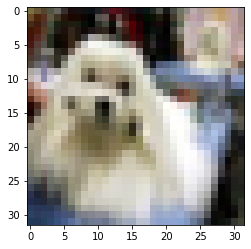

Guess: bird | Label: bird


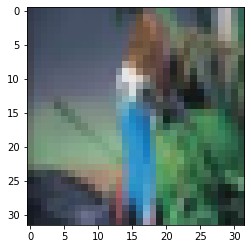

Guess: deer | Label: deer


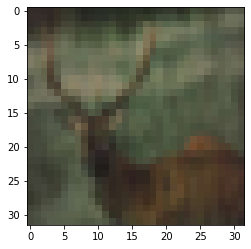

Guess: car | Label: car


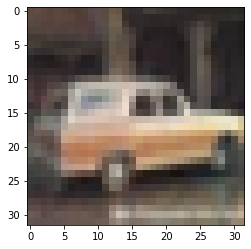

Guess: truck | Label: truck


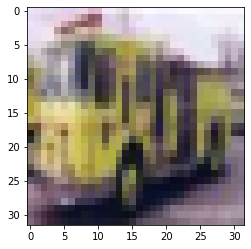

Guess: plane | Label: plane


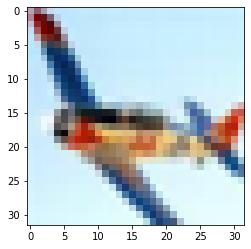

Guess: truck | Label: truck


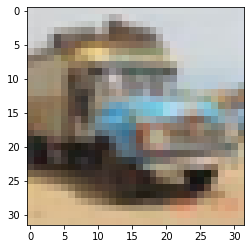

Guess: ship | Label: ship


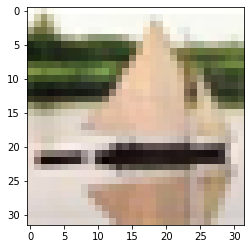

Guess: plane | Label: plane


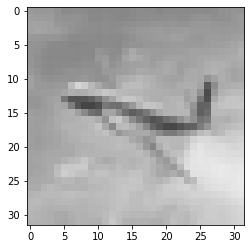

Guess: truck | Label: truck


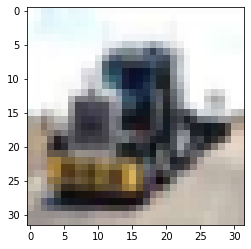

Guess: dog | Label: dog


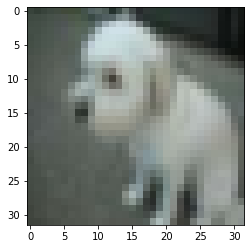

Guess: truck | Label: truck


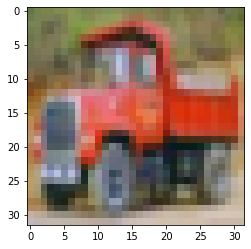

Guess: truck | Label: truck


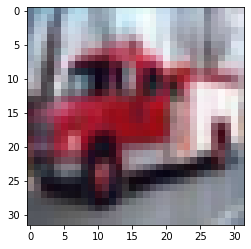

Guess: car | Label: car


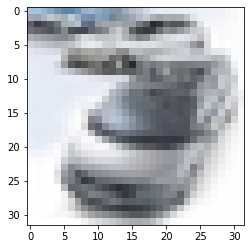

Guess: deer | Label: deer


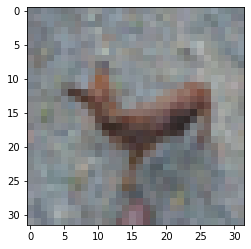

In [49]:
for epoch in range(NUM_EPOCHS):
    train()
    test(TrainDataLoader)

In [51]:
# EVALUATION STEP
model.eval()
correct = 0
total = 0
for data in iter(TestDataLoader):
    batch_inputs, batch_labels = data
    predictions = model(batch_inputs).argmax(axis=1)
    total += len(batch_inputs)
    correct += (predictions==batch_labels).sum().item()
print(100*correct/total,"%")

95.734 %


In [52]:
torch.save(model.state_dict(), "./CIFAR-Model.pt")
print("Saved model!")

Saved model!


In [ ]:
MyNewModel = CustomModel(3, 10)
MyNewModel.load_state_dict(torch.load("./CIFAR-Model.pt"))